#**TF/IDF CLASSWORK-3**

**IMPORTING THE LIBRARIES**

In [1]:
import pandas as pd

In [9]:
file=r"C:\Users\HP\Downloads\un-general-debates-blueprint (2).csv"

In [10]:
df=pd.read_csv(file)

In [11]:
df.head(5)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


**GETTING THE STOPWORDS**

In [12]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'each', 'of', 'both', 'when', 'him', 'wouldn', "aren't", 'during', 'needn', 'haven', 'will', 'where', 'at', 'hadn', 'did', 'have', 'this', "won't", 'with', 'his', 'theirs', "weren't", 'or', 'such', 'couldn', 'shouldn', 'wasn', 'won', 'yourself', 'doing', 'between', 'in', 'themselves', 'ain', 'no', "mustn't", "shan't", 'he', 'below', 'is', 'now', 'having', "it's", "you'll", 'she', 'before', 'to', 'they', 'don', 'who', 'itself', 'should', 'under', 'shan', 'myself', 'while', 'a', 'and', "wasn't", "you're", 'why', "that'll", 'some', 'how', 'mightn', "haven't", "doesn't", 'further', 'herself', 'same', "needn't", 'over', 'few', 'what', 'any', "didn't", 're', 'yours', 'against', 'the', 'on', 'mustn', 'being', "you'd", 'very', 'been', 'as', 'off', 'again', "she's", 'above', "should've", 'their', 'ma', 'himself', 'because', "couldn't", 'all', 'were', 'had', 'doesn', 'yourselves', 'just', 'through', "hadn't", 'there', 't', 'by', "hasn't", 'for', 'after', 'which', 'those', 'from', 'most', 'until

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**PRE-PROCESSING THE PIPE LINE**

In [13]:
import regex as re

In [15]:
def tokenize(text):
  return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
  return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [16]:
def prepare(text, pipeline):
  tokens = text
  for fun in pipeline:
    tokens = fun(tokens)
  return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)


**COUNTING THE TOKENS**

In [19]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


WORDCLOUD OF TEXT FREQUENCY

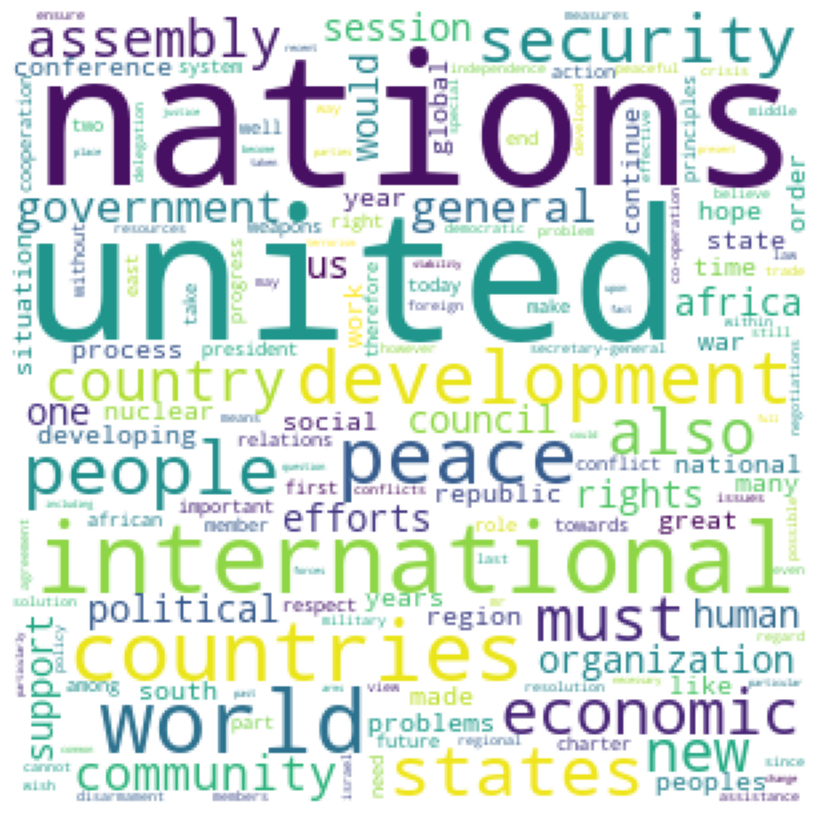

In [20]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

TEXT FREQUENCY / INVERSE DOCUMENT FREQUENCY OF AND COMPARISION

In [22]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

TFIDF = TF * IDF

In [23]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986


WORDCLOUD OF TEXT FREQUENCY INVERSE DOCUMENT FREQUENCY

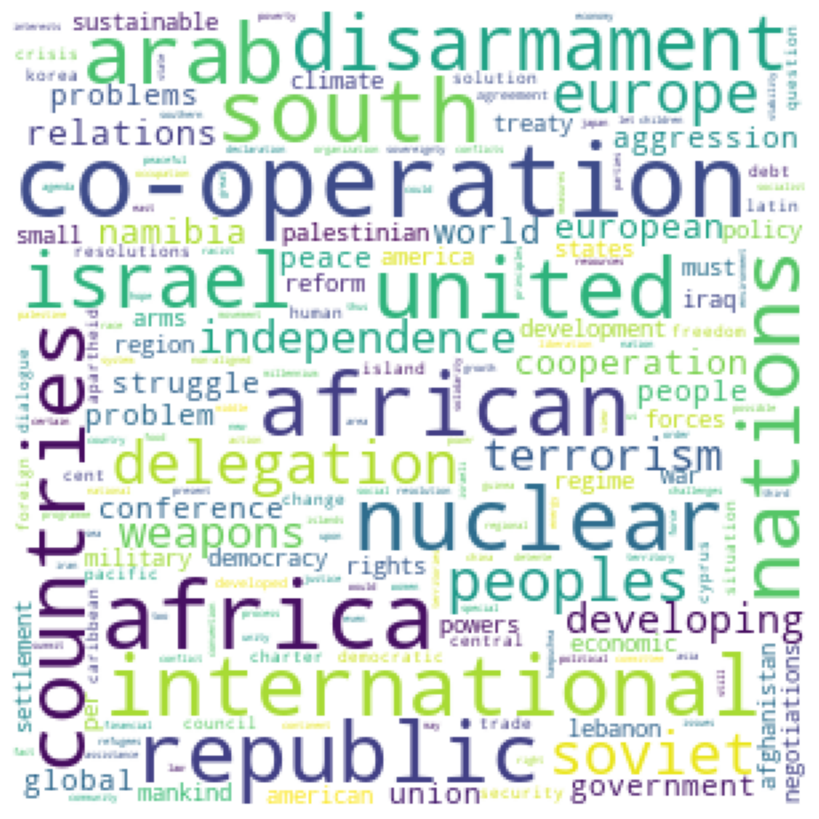

In [24]:
wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()